## Abstract

Here i'm trying to classify a variable in a fraud detection data. I had some problems with the logistic regression and maybe is because the data has more no fraudulent data then the opposite. In the exploratory i see that fraudulent transactions has more ammount then the normal transaction. And in the final result i liked it, if you think that something can be improved please comment, it's a plearuse.


## Setup

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as srn
import statistics  as sts
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Reading and preparing data

In [2]:
data = pd.read_csv('pay sim.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

## Exploratory

In [5]:
data.shape

(6362620, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

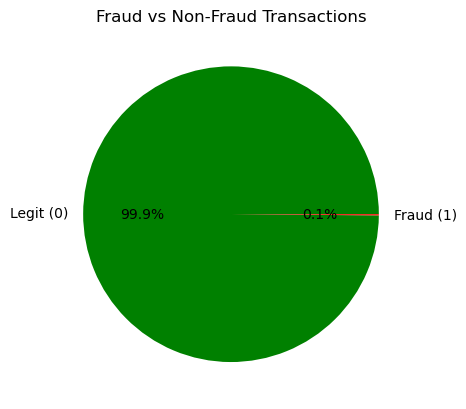

In [9]:
import matplotlib.pyplot as plt
plt.pie(data['isFraud'].value_counts(), 
        labels=['Legit (0)', 'Fraud (1)'], 
        autopct='%1.1f%%', 
        colors=['green', 'red'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

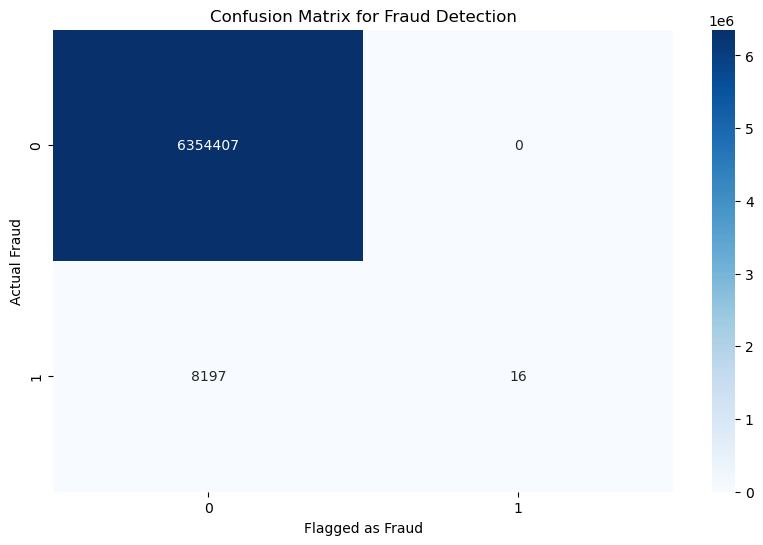

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(data['isFraud'], data['isFlaggedFraud'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Flagged as Fraud')
plt.ylabel('Actual Fraud')
plt.title('Confusion Matrix for Fraud Detection')
plt.show()

Text(0.5, 1.0, 'Transaction Amounts: Fraud vs Legit')

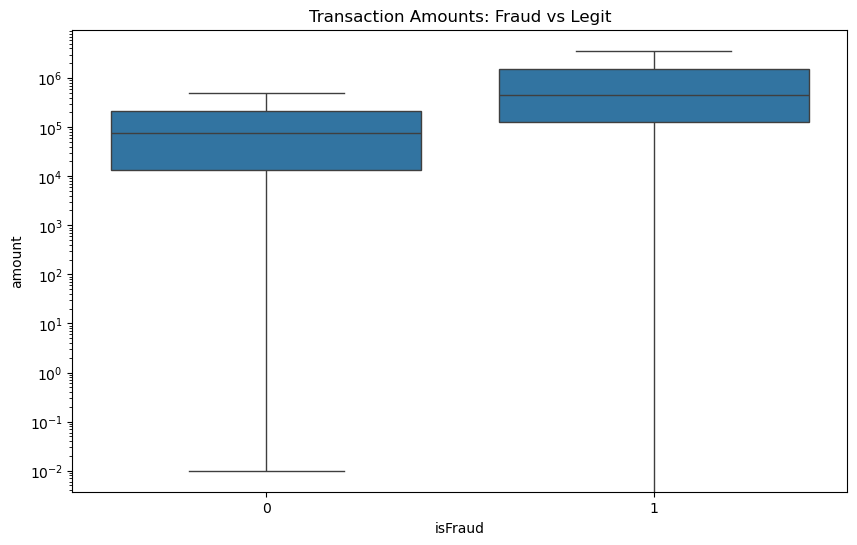

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=data, showfliers=False)  # Remove outliers
plt.yscale('log')  # Log scale for better visibility
plt.title('Transaction Amounts: Fraud vs Legit')

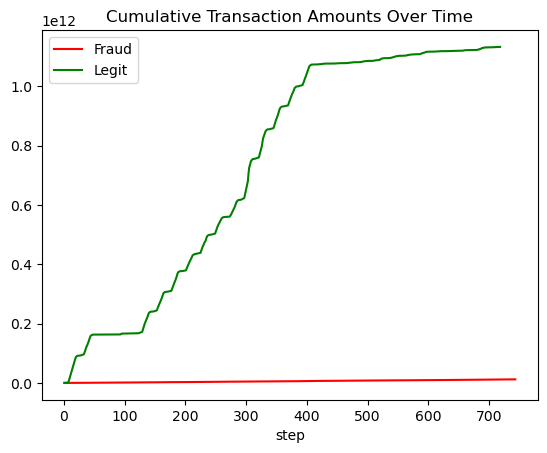

In [12]:
fraud_amounts = data[data['isFraud']==1].groupby('step')['amount'].sum()
legit_amounts = data[data['isFraud']==0].groupby('step')['amount'].sum()

fraud_amounts.cumsum().plot(label='Fraud', color='red')
legit_amounts.cumsum().plot(label='Legit', color='green')
plt.title('Cumulative Transaction Amounts Over Time')
plt.legend()

## Feature Engineering

In [13]:
# 1. Transaction velocity (fraudsters act fast)
data['txn_velocity'] = data.groupby('nameOrig')['step'].diff().fillna(0)

# 2. Balance change ratio (fraud often drains accounts)
data['balance_change_ratio'] = (data['newbalanceOrig'] + 1e-6) / (data['oldbalanceOrg'] + 1e-6)

# 3. Zero-balance after transaction (common in fraud)
data['zero_balance_after'] = (data['newbalanceOrig'] == 0).astype(int)

In [14]:
# 1. Destination recurrence (money mule detection)
data['dest_freq'] = data.groupby('nameDest')['nameDest'].transform('count')

# 2. New payee flag (first-time transactions riskier)
data['new_payee'] = ~data['nameDest'].isin(data['nameOrig'].unique()).astype(int)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   step                  int64  
 1   type                  object 
 2   amount                float64
 3   nameOrig              object 
 4   oldbalanceOrg         float64
 5   newbalanceOrig        float64
 6   nameDest              object 
 7   oldbalanceDest        float64
 8   newbalanceDest        float64
 9   isFraud               int64  
 10  isFlaggedFraud        int64  
 11  txn_velocity          float64
 12  balance_change_ratio  float64
 13  zero_balance_after    int32  
 14  dest_freq             int64  
 15  new_payee             int32  
dtypes: float64(7), int32(2), int64(4), object(3)
memory usage: 728.1+ MB


## ENCODING

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {} 
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   step                  int64  
 1   type                  int32  
 2   amount                float64
 3   nameOrig              int32  
 4   oldbalanceOrg         float64
 5   newbalanceOrig        float64
 6   nameDest              int32  
 7   oldbalanceDest        float64
 8   newbalanceDest        float64
 9   isFraud               int64  
 10  isFlaggedFraud        int64  
 11  txn_velocity          float64
 12  balance_change_ratio  float64
 13  zero_balance_after    int32  
 14  dest_freq             int64  
 15  new_payee             int32  
dtypes: float64(7), int32(5), int64(4)
memory usage: 655.3 MB


## Correlation 

In [18]:
data.corr()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,txn_velocity,balance_change_ratio,zero_balance_after,dest_freq,new_payee
step,1.000000,0.006635,0.022373,-0.000146,-0.010058,-0.010299,0.003767,0.027665,0.025888,0.031578,0.003277,0.028626,-0.004838,0.005390,-0.336167,0.000653
type,0.006635,1.000000,0.088419,0.000213,-0.339760,-0.352758,0.584275,-0.104679,-0.059364,0.020833,0.002685,-0.000038,-0.047192,0.275044,-0.354977,0.022509
amount,0.022373,0.088419,1.000000,0.000124,-0.002762,-0.007861,-0.169150,0.294137,0.459304,0.076688,0.012295,0.000426,0.005466,0.115566,0.158413,-0.006572
nameOrig,-0.000146,0.000213,0.000124,1.000000,-0.000648,-0.000675,-0.000256,0.000245,0.000255,-0.000464,0.000667,-0.000385,-0.000148,0.000546,0.000409,-0.000027
oldbalanceOrg,-0.010058,-0.339760,-0.002762,-0.000648,1.000000,0.998803,-0.162688,0.066243,0.042029,0.010154,0.003835,-0.000373,-0.010731,-0.323722,0.142752,-0.005640
newbalanceOrig,-0.010299,-0.352758,-0.007861,-0.000675,0.998803,1.000000,-0.166489,0.067812,0.041837,-0.008148,0.003776,-0.000358,-0.007455,-0.334857,0.145336,-0.005795
nameDest,0.003767,0.584275,-0.169150,-0.000256,-0.162688,-0.166489,1.000000,-0.198119,-0.203992,-0.021963,-0.001122,-0.000186,-0.022669,-0.068758,-0.504020,0.028275
oldbalanceDest,0.027665,-0.104679,0.294137,0.000245,0.066243,0.067812,-0.198119,1.000000,0.976569,-0.005885,-0.000513,0.000939,0.011049,0.041383,0.378800,-0.006544
newbalanceDest,0.025888,-0.059364,0.459304,0.000255,0.042029,0.041837,-0.203992,0.976569,1.000000,0.000535,-0.000529,0.000894,0.006682,0.079761,0.375987,-0.006926
isFraud,0.031578,0.020833,0.076688,-0.000464,0.010154,-0.008148,-0.021963,-0.005885,0.000535,1.000000,0.044109,0.001403,-0.001336,0.029984,-0.008982,-0.000079


<Axes: >

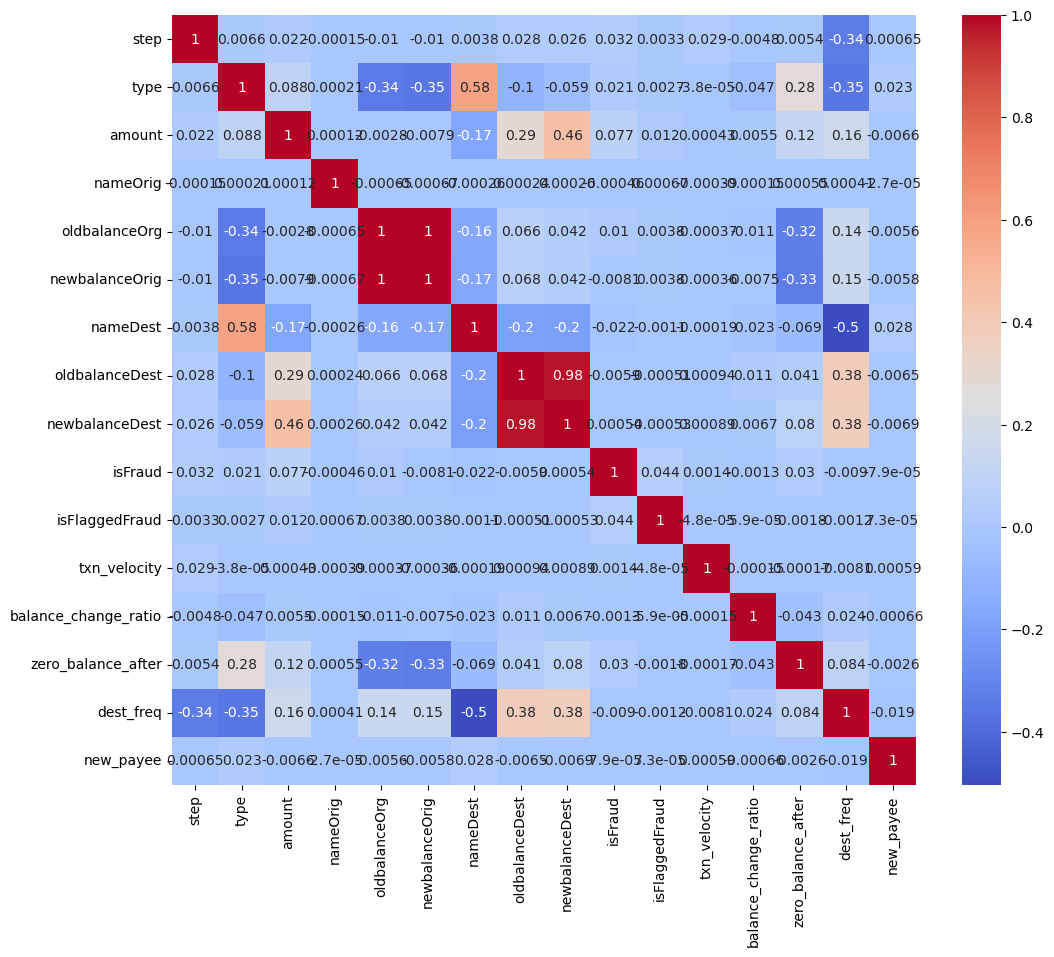

In [19]:

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [20]:
data.corr()['isFraud'].sort_values(ascending=False)

isFraud                 1.000000
amount                  0.076688
isFlaggedFraud          0.044109
step                    0.031578
zero_balance_after      0.029984
type                    0.020833
oldbalanceOrg           0.010154
txn_velocity            0.001403
newbalanceDest          0.000535
new_payee              -0.000079
nameOrig               -0.000464
balance_change_ratio   -0.001336
oldbalanceDest         -0.005885
newbalanceOrig         -0.008148
dest_freq              -0.008982
nameDest               -0.021963
Name: isFraud, dtype: float64

## Data Balance

In [21]:
data = pd.read_csv('pay sim.csv')

data = data.drop(data.index[0])

fraud = data[data['isFraud'] == 1]

non_fraud = data[data['isFraud'] == 0]

n_non_fraud = len(non_fraud)

fraud_upsampled = fraud.sample(n_non_fraud, replace=True)

data_upsampled = pd.concat([fraud_upsampled, non_fraud])

data = data_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)



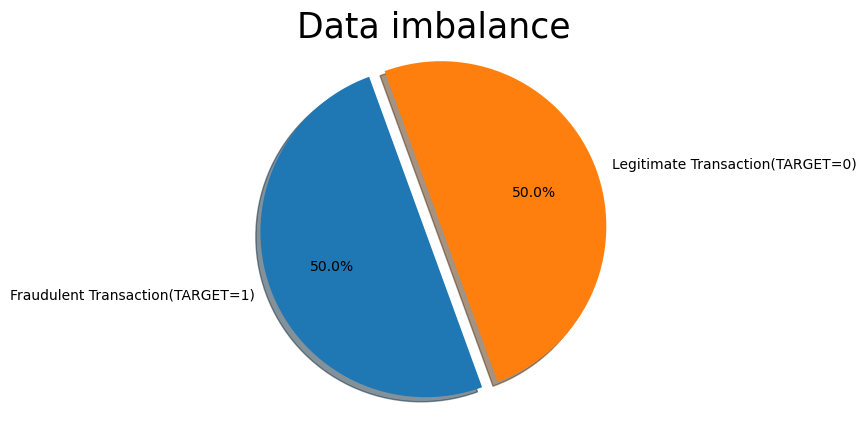

In [22]:
data = data_upsampled
count1 = 0 
count0 = 0
for i in data['isFraud'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(data['isFraud']))*100
count0 = (count0/len(data['isFraud']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

In [23]:
data['isFraud'].value_counts()

isFraud
1    6354406
0    6354406
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {} 
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12708812 entries, 6014708 to 6362323
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 1018.1 MB


## Modeling

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12708812 entries, 6014708 to 6362323
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 1018.1 MB


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler



# 1. Verify and prepare columns --------------------------------------------
# Print columns to see what you actually have
print("Current columns:", data.columns.tolist())

# 2. Feature Engineering --------------------------------------------------
# If your transaction type column has a different name (e.g., 'transactionType'):
# First rename it to 'type' for consistency with our code
if 'transactionType' in data.columns:
    data = data.rename(columns={'transactionType': 'type'})

# Now perform one-hot encoding
if 'type' in data.columns:
    data = pd.get_dummies(data, columns=['type'], drop_first=True)
else:
    print("Warning: No transaction type column found")

# 3. Create engineered features -------------------------------------------
data['balance_drop_ratio'] = (data['oldbalanceOrg'] - data['newbalanceOrig']) / (data['oldbalanceOrg'] + 1e-6)
data['zero_balance_after'] = (data['newbalanceOrig'] == 0).astype(int)

# 4. Prepare final features -----------------------------------------------
features = [
    'step',
    'amount',
    'oldbalanceOrg',
    'balance_drop_ratio', 
    'zero_balance_after'
]

# Add type columns if they exist
for col in data.columns:
    if col.startswith('type_'):
        features.append(col)

# 5. Create X and y ------------------------------------------------------
X = data[features]
y = data['isFraud'].values

# 6. Split data into training and testing sets --------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   


print("Final features used:", features)

Current columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
Final features used: ['step', 'amount', 'oldbalanceOrg', 'balance_drop_ratio', 'zero_balance_after', 'type_1', 'type_2', 'type_3', 'type_4']


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['type_1'] = le.fit_transform(data['type_1'])
data['type_2'] = le.fit_transform(data['type_2'])
data['type_3'] = le.fit_transform(data['type_3'])
data['type_4'] = le.fit_transform(data['type_4'])

In [30]:
print(data.columns.tolist())

['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_1', 'type_2', 'type_3', 'type_4', 'balance_drop_ratio', 'zero_balance_after']


### Logistic Regression

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE



# ----- Step 1: Encode object columns (if any) -----
object_cols = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=object_cols, drop_first=True)

# ----- Step 2: Split features and target -----
X = data[features]
y = data['isFraud']

# ----- Step 3: Train-test split -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ----- Step 4: Apply SMOTE -----
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_sm.value_counts().to_dict())

# ----- Step 5: Train Logistic Regression -----
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_sm, y_train_sm)

# ----- Step 6: Predict and evaluate -----
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before SMOTE: {1: 5083525, 0: 5083524}
After SMOTE: {0: 5083525, 1: 5083525}

Confusion Matrix:
 [[1032680  238202]
 [  25847 1245034]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89   1270882
           1       0.84      0.98      0.90   1270881

    accuracy                           0.90   2541763
   macro avg       0.91      0.90      0.90   2541763
weighted avg       0.91      0.90      0.90   2541763


ROC-AUC Score: 0.9596334011216426


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


X = data[features]
y = data['isFraud']

# ---------- Step 2: Train-test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

model_rf = RandomForestClassifier(
    n_estimators=50,              # Fewer trees = less complexity
    max_depth=5,                  # Shallow trees prevent overfitting
    min_samples_split=20,         # Larger min samples to split
    min_samples_leaf=10,          # More samples in leaf
    max_features=0.3,             # Use only 30% of features per tree
    class_weight='balanced',      # Handle imbalance
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
y_proba = model_rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred), 4))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 4))


Confusion Matrix:
 [[1214133   56749]
 [  19153 1251728]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97   1270882
           1       0.96      0.98      0.97   1270881

    accuracy                           0.97   2541763
   macro avg       0.97      0.97      0.97   2541763
weighted avg       0.97      0.97      0.97   2541763

Accuracy Score: 0.9701
ROC-AUC Score: 0.995


### XGBoost 

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score



X = data[features]
y = data['isFraud']

# ---------- Step 2: Train-test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
# Calculate scale_pos_weight only if imbalance exists, else leave as 1
scale_pos_weight = 1  # Since you mentioned balanced classes

model_xgb = XGBClassifier(
    n_estimators=100,
    max_depth=4,                # Restrict tree depth
    learning_rate=0.1,          # Conservative learning
    subsample=0.7,              # Randomly sample rows
    colsample_bytree=0.7,       # Randomly sample features
    min_child_weight=5,         # Minimum sum of weights in a leaf
    reg_alpha=0.5,              # L1 regularization
    reg_lambda=0.8,             # L2 regularization
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
y_proba = model_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred), 4))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 4))


Confusion Matrix:
 [[1253714   17168]
 [   4160 1266721]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270882
           1       0.99      1.00      0.99   1270881

    accuracy                           0.99   2541763
   macro avg       0.99      0.99      0.99   2541763
weighted avg       0.99      0.99      0.99   2541763

Accuracy Score: 0.9916
ROC-AUC Score: 0.9994


In [44]:
import pickle

# with open('model_logistic.pkl', 'wb') as file:
#     pickle.dump(model, file)
# with open('model_rf.pkl', 'wb') as file:
#     pickle.dump(model_rf, file)
with open('model_xgb.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)    